## Highest Correlated Features by Model and Scaling type

In [ ]:
# Standard Scaling
dt_importance_std = dt_model.feature_importances_
rf_importance_std = rf_model.feature_importances_
xgb_importance_std = xgb_model.feature_importances_

In [ ]:
# Min-Max Scaling
dt_importance_mm = dt_model.feature_importances_### STD Model Comparison Table 
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [np.sqrt(mean_squared_error(y_test_1, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_dt)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test_1, y_pred_xgb))],
    'R2 Score': [r2_score(y_test_1, y_pred_lr),
                 r2_score(y_test_1, y_pred_dt),
                 r2_score(y_test_1, y_pred_rf),
                 r2_score(y_test_1, y_pred_xgb)]
}

results_df = pd.DataFrame(results)
print(results_df)

rf_importance_mm = rf_model.feature_importances_
xgb_importance_mm = xgb_model.feature_importances_

               Model       RMSE  R2 Score
0  Linear Regression  16.423524 -0.052112
1      Decision Tree  23.314402 -1.120204
2      Random Forest  20.237325 -0.597480
3            XGBoost  21.281860 -0.766641


In [ ]:
feature_names = X_train_1.columns

In [ ]:
def plot_feature_importance(importances, feature_names, model_names, title):
    plt.figure(figsize=(15, 15))
    
    # Create a DataFrame with feature importances
    df = pd.DataFrame(importances, index=model_names, columns=feature_names)
    
    # Sort features by average importance across all models
    avg_importance = df.mean()
    sorted_features = avg_importance.sort_values(ascending=False).index
    
    # Create a custom color map from blue to cerulean
    colors = ["#0000FF", "#00BFFF"]  # Blue to Cerulean
    n_bins = 100
    cmap = mcolors.LinearSegmentedColormap.from_list("custom", colors, N=n_bins)
    
    # Create heatmap
    sns.heatmap(df[sorted_features], annot=True, cmap=cmap, fmt='.2f')
    
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Models')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


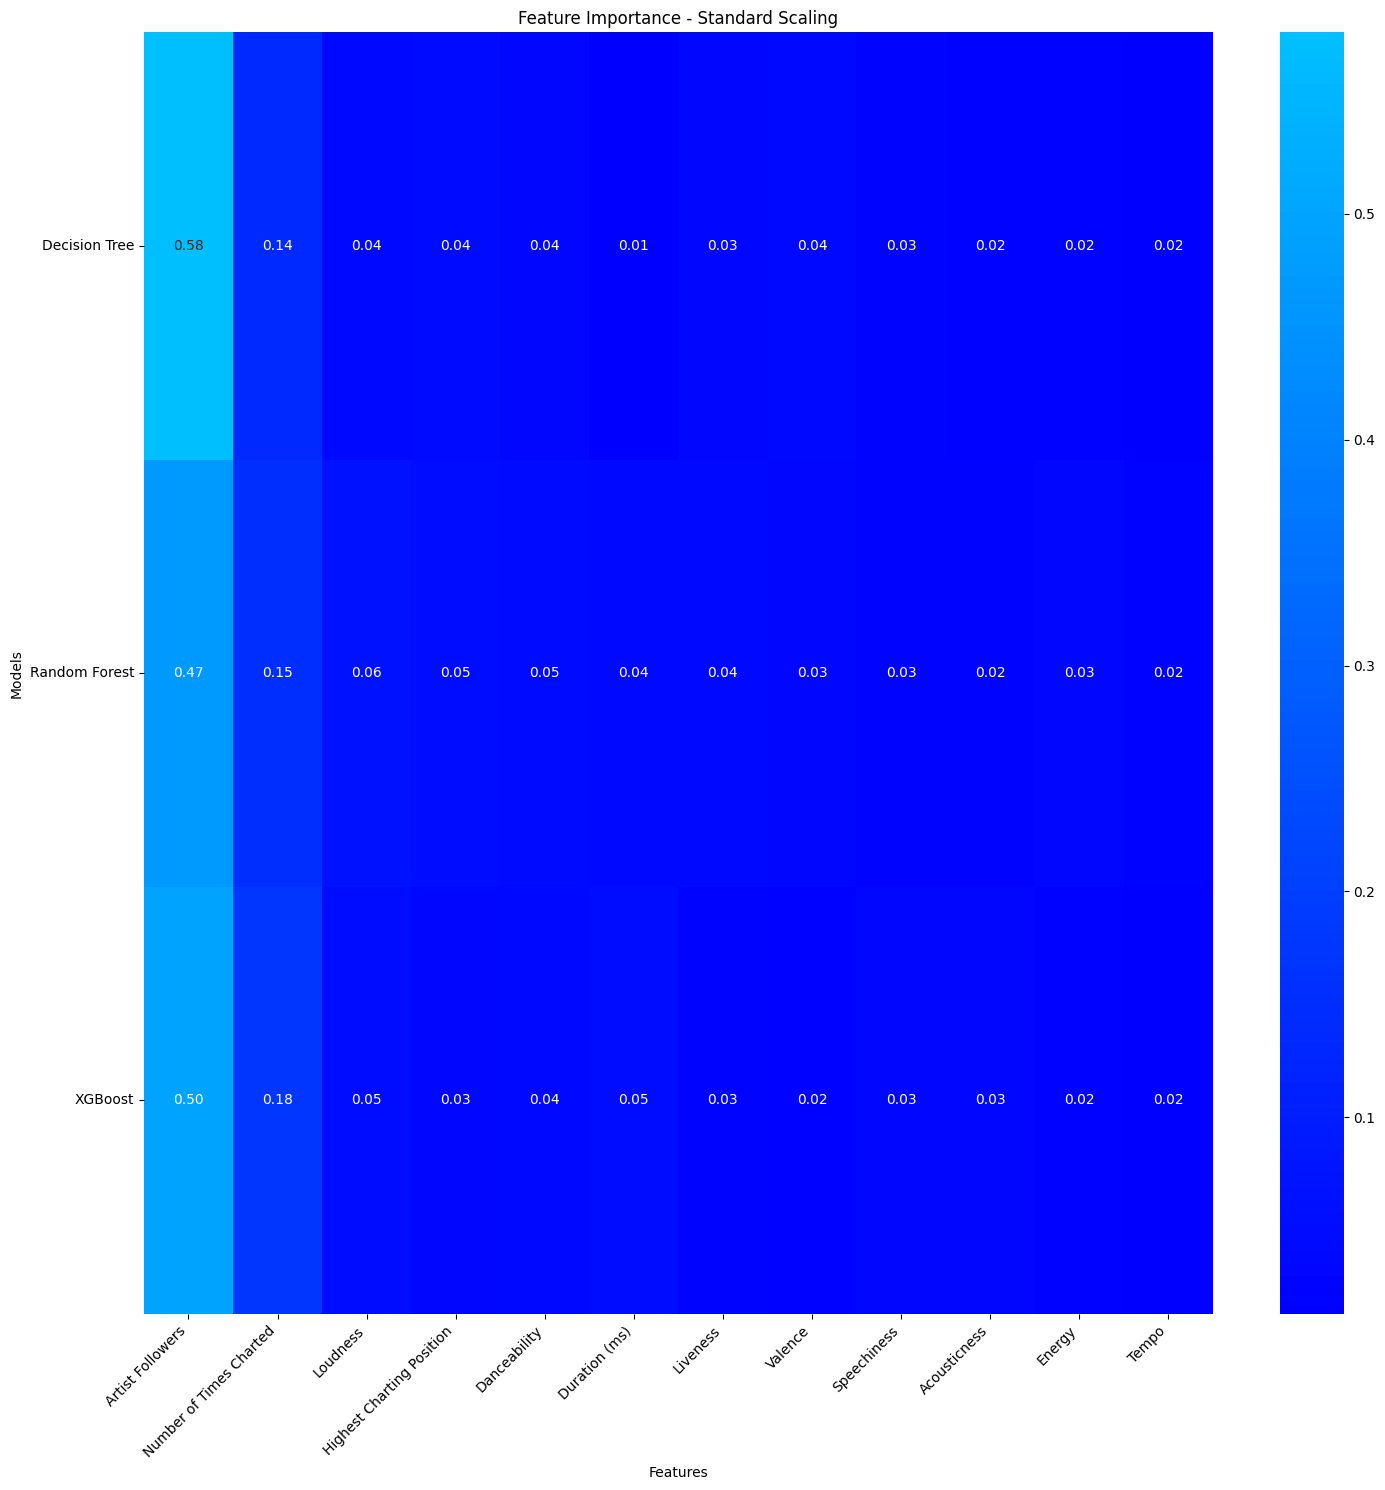

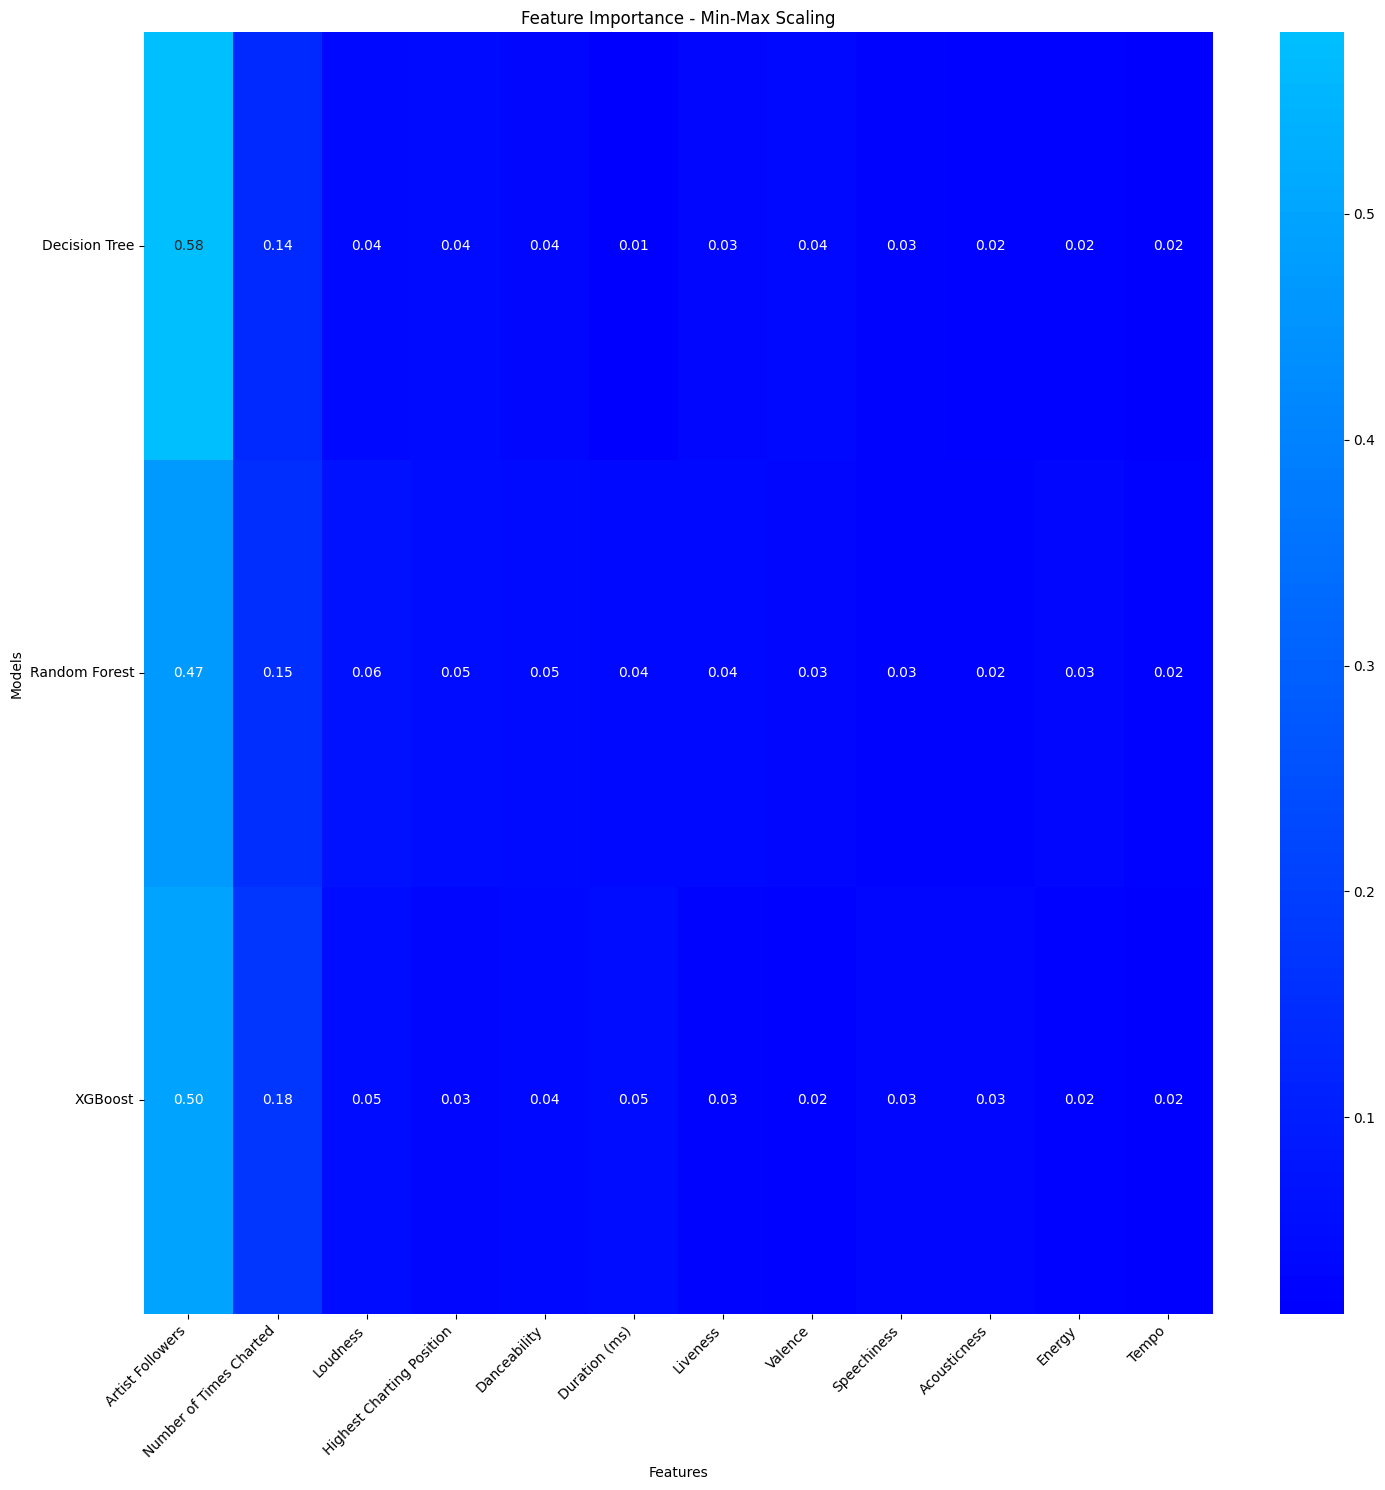

In [ ]:
# Standard Scaling
importances_std = [dt_importance_std, rf_importance_std, xgb_importance_std]
model_names = ['Decision Tree', 'Random Forest', 'XGBoost']
plot_feature_importance(importances_std, feature_names, model_names, 'Feature Importance - Standard Scaling')

# Min-Max Scaling
importances_mm = [dt_importance_mm, rf_importance_mm, xgb_importance_mm]
plot_feature_importance(importances_mm, feature_names, model_names, 'Feature Importance - Min-Max Scaling')
